<a href="https://colab.research.google.com/github/Clever-Lazinezz/NoteBook/blob/main/Iris_Data_Analysi_Honors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identify the Problem

There are three distinct classes which have the same data collected from them. Using various techniques, I want to create a model that will precisely predict the class given the data collected.

## Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly

"""
import cufflinks as cf # need to buy license for online use
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

cf.go_offline() #allows for non-profit use of cufflinks



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
"""

"\nimport cufflinks as cf # need to buy license for online use\nplt.style.use('ggplot')\nplt.rcParams['figure.figsize'] = (12,8)\n\ncf.go_offline() #allows for non-profit use of cufflinks\n\n\n\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split\n"

## Load the Data

In [2]:
# https://www.sciencedirect.com/topics/mathematics/length-sepal

In [3]:
# will read damn near any type of file
data = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/iris.csv')

## EDA(Exploratory Data Analysis)

In [4]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# irrelevant
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# I don't like altering the original dataset - allows me to recall the original data at any time
# setting dataframe equal to a new value creates a copy
train = data

In [8]:
# Is having zero okay?
train['Class'] = train['Class'].replace(['Setosa'],'0')
train['Class'] = train['Class'].replace(['Versicolor'],'1')
train['Class'] = train['Class'].replace(['Virginica'],'2')

## Data Visualization

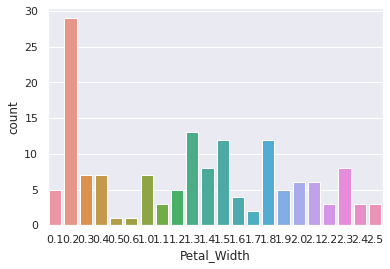

In [9]:
# Visualizes the most common petal widths, and shows possible needs for scaling
sns.countplot(x='Petal_Width', data=data)

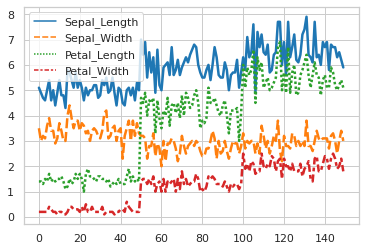

In [10]:
# X-axis is the index and Y-axis is the length in centimeters
# Shows growth patterns for each column 
sns.set_theme(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

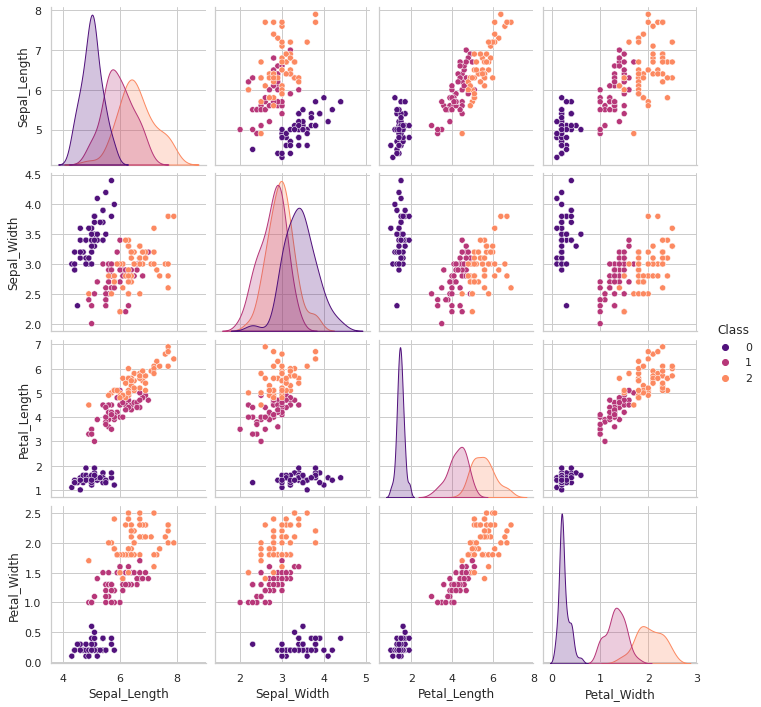

In [11]:
# Provides a general overview of how the data of each Class type compares to each other.
# Helps see which data column has the largest correlation with a given class
sns.pairplot(data, hue='Class', palette='magma')

# Linear Regression on the Data

## First Data Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Class', axis=1), data['Class'], test_size = 0.33)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Predicitions based on entire dataset
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.87      0.93        15
           2       0.85      1.00      0.92        11

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50

[[24  0  0]
 [ 0 13  2]
 [ 0  0 11]]


## Second Data Split

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# iloc creates data split
# predictions made using only sepal data
X = train.drop('Class', axis=1)
X = train.iloc[:, [0, 1]].values
y = train.iloc[:, -1].values


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [22]:
"""
Predictions were made using only sepal data, leading to a decrease in precision.
Primarily Class '1' & '2' were affected, implying that petal data may have a 
higher correlation to predicting the class.
"""
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.68      0.68      0.68        19
           2       0.64      0.60      0.62        15

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.75      0.76      0.76        50

[[16  0  0]
 [ 1 13  5]
 [ 0  6  9]]


## Third Data Split

In [23]:
# predictions made using only pedal data
X = train.drop('Class', axis=1)
X = train.iloc[:, [2, 4]].values
y = train.iloc[:, -1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [26]:
"""
This model uses only pedal data. Either pedal data is extremely accurate for 
predicting class type or an error was made. Given the scientific background of the 
data, it is reasonable to believe that experimental groups were created to be 
diffrentiable. Thus having distinct species, that may have distinct features. 
Further analysis is required.
"""
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[16  0  0]
 [ 0 19  0]
 [ 0  0 15]]


# KNN Analysis on the Data

KNeighborsClassifier implements classification based on voting by nearest k-neighbors of target point(k)

## First Data Split

In [27]:
df1 = data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(df1.drop('Class', axis=1))
scaled_features = scaler.transform(df1.drop('Class', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df1.columns[:-1])

In [31]:
df_feat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df1['Class'], test_size = 0.25, random_state = 0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

### Scaled Data Results

Scaling is used when the data is 'all over the place'; however, this data was recorded very well. This makes sense this was a professional scientific experiment.

Since the first report had its test values look at only 1 neighboring value, they were less likely to be adjusted. This ended up in a higher precision score than the second report. Remember, precision is a measurment of how close data is to each other, or some other target point(ex. line of best fit). This is different from accuracy in sciences.

In [35]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [36]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [37]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]


## Second Data Split

In [38]:
X = df1.drop('Class', axis=1)
X = df1.iloc[:, [0, 1]].values
y = df1.iloc[:, -1].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [41]:
# This model was fed only half the total data. It's notable that 
# the precision of Class '2', is the most affected. It's reasonable 
# to theorize that data for Class '2' could be more of a cluster for 
# the selected columns of data used to test the model.
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.64      0.72        14
           2       0.67      0.83      0.74        12

    accuracy                           0.82        38
   macro avg       0.83      0.83      0.82        38
weighted avg       0.83      0.82      0.81        38



In [42]:
df1.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Class '0' has a larger sepal width growth than sepal length... The cluster for Class '1' and ESPECIALLY Class '2' is larger in the first model below; this corresponds with my hypothesis that "that data for Class '2' could be more of a cluster for the selected columns of data used to test the model

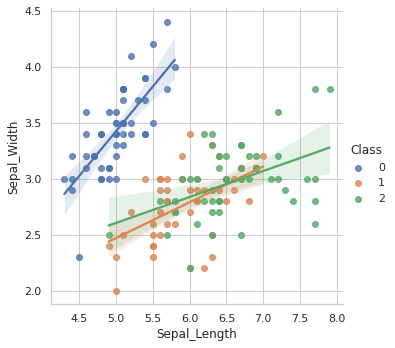

In [43]:
sns.lmplot(data=df1,x='Sepal_Length', y='Sepal_Width', hue='Class')

It would be reasonable to hypothesis a high precision given the cluster of Classes '0' and '1' are relatively tightly spaced. However, Class '2' would run into similar issues.

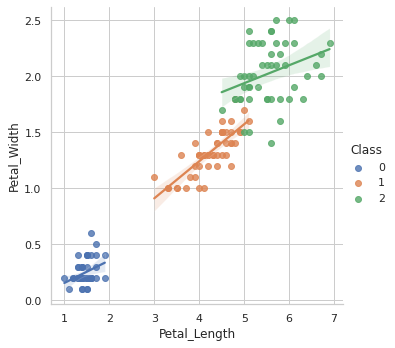

In [44]:
sns.lmplot(data=df1,x='Petal_Length', y='Petal_Width', hue='Class')

# SVM Model of Data

In [45]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [46]:
from sklearn.svm import SVC

In [47]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.00 %
Standard Deviation: 4.00 %


In [50]:
# Import the DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# Create the data for the tree.
X = [[0, 0], [1, 1]]
y = [0, 1]

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X, y)

# Use the trained classifier to make predictions
prediction = clf.predict([[2., 2.]])
print(prediction)  # Output: [1]

[1]
